In [4]:
!pip install mlrose-hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.6 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=823e5e1a12c3fb636172d77998f7ea9d37db0fce911a3e05251e4dcdb00c82d1
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [5]:
#import libraries
import pandas as pd
import numpy as np
import time
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

In [6]:
#setup fitness function
OM_fitness = mlrose.OneMax()
vectorsizes = [10, 20, 40, 60, 80, 100, 150, 200]
repeats = 10

In [7]:
# RHC - Iterate through vector size, random initial state vectors

RHC_mean_time = []
RHC_mean_iterations = []
RHC_mean_fitness = []
RHC_std_time = []
RHC_std_iterations = []
RHC_std_fitness = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = OM_fitness)
  RHC_time = []
  RHC_iterations = []
  RHC_best_fitness = []
  for reps in range(repeats):
    start_state = np.random.choice(2, size = vectorsizes[size])
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = 1000, restarts = 10, init_state = start_state, curve = True)
    toc = time.perf_counter()
    RHC_time.append(toc-tic)
    RHC_iterations.append(len(history))
    RHC_best_fitness.append(best_fitness)

  RHC_mean_time.append(np.mean(RHC_time))
  RHC_mean_iterations.append(np.mean(RHC_iterations))
  RHC_mean_fitness.append(np.mean(RHC_best_fitness))
  RHC_std_time.append(np.std(RHC_time))
  RHC_std_iterations.append(np.std(RHC_iterations))
  RHC_std_fitness.append(np.std(RHC_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',RHC_mean_time[size], '   ', RHC_std_time[size], ')')
  print('iterations (mean, std): (',RHC_mean_iterations[size], '   ', RHC_std_iterations[size], ')')
  print('best fitness (mean, std): (',RHC_mean_fitness[size], '   ', RHC_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.04029167299999727     0.010880853081042814 )
iterations (mean, std): ( 127.8     17.313578486263317 )
best fitness (mean, std): ( 10.0     0.0 )
************************ vector size:  20
time (mean, std): ( 0.06251087010000163     0.01701548305087553 )
iterations (mean, std): ( 157.8     35.09073951913809 )
best fitness (mean, std): ( 20.0     0.0 )
************************ vector size:  40
time (mean, std): ( 0.08949159439999903     0.022493238370992808 )
iterations (mean, std): ( 245.3     41.32807762284619 )
best fitness (mean, std): ( 40.0     0.0 )
************************ vector size:  60
time (mean, std): ( 0.12768696219999925     0.04498865298018531 )
iterations (mean, std): ( 279.5     40.102992407051126 )
best fitness (mean, std): ( 60.0     0.0 )
************************ vector size:  80
time (mean, std): ( 0.1358127345000014     0.04080415520792476 )
iterations (mean, std): ( 410.3     37.63787985527346 )
best 

In [18]:
# SA - Iterate through vector size, random initial state vectors

SA_mean_time = []
SA_mean_iterations = []
SA_mean_fitness = []
SA_std_time = []
SA_std_iterations = []
SA_std_fitness = []
SA_schedule = mlrose.GeomDecay(init_temp=15, decay=0.85, min_temp=.01)

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = OM_fitness)
  SA_time = []
  SA_iterations = []
  SA_best_fitness = []
  for reps in range(repeats):
    start_state = np.random.choice(2, size = vectorsizes[size])
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.simulated_annealing(problem, schedule = SA_schedule, max_attempts = 100, max_iters = 1000, init_state = start_state, curve = True)
    toc = time.perf_counter()
    SA_time.append(toc-tic)
    SA_iterations.append(len(history))
    SA_best_fitness.append(best_fitness)

  SA_mean_time.append(np.mean(SA_time))
  SA_mean_iterations.append(np.mean(SA_iterations))
  SA_mean_fitness.append(np.mean(SA_best_fitness))
  SA_std_time.append(np.std(SA_time))
  SA_std_iterations.append(np.std(SA_iterations))
  SA_std_fitness.append(np.std(SA_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',SA_mean_time[size], '   ', SA_std_time[size], ')')
  print('iterations (mean, std): (',SA_mean_iterations[size], '   ', SA_std_iterations[size], ')')
  print('best fitness (mean, std): (',SA_mean_fitness[size], '   ', SA_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.004817784199985908     0.001617222695292752 )
iterations (mean, std): ( 129.1     8.3 )
best fitness (mean, std): ( 10.0     0.0 )
************************ vector size:  20
time (mean, std): ( 0.010972794000031172     0.0031627865898313542 )
iterations (mean, std): ( 178.3     22.5168825550963 )
best fitness (mean, std): ( 20.0     0.0 )
************************ vector size:  40
time (mean, std): ( 0.01635055559997909     0.0026033200228333243 )
iterations (mean, std): ( 256.2     28.091991741419832 )
best fitness (mean, std): ( 39.9     0.3 )
************************ vector size:  60
time (mean, std): ( 0.01800078360001862     0.004884633399103443 )
iterations (mean, std): ( 277.3     46.86587244466916 )
best fitness (mean, std): ( 59.4     1.2806248474865698 )
************************ vector size:  80
time (mean, std): ( 0.021822542599988993     0.0029064190222594095 )
iterations (mean, std): ( 375.0     51.2015624761588

In [19]:
# GA - Iterate through vector size, random initial state vectors

GA_mean_time = []
GA_mean_iterations = []
GA_mean_fitness = []
GA_std_time = []
GA_std_iterations = []
GA_std_fitness = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = OM_fitness)
  GA_time = []
  GA_iterations = []
  GA_best_fitness = []
  for reps in range(repeats):
    #start_state = np.random.choice(2, size = vectorsizes[size]) - not used in mlrose.genetic_alg
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.genetic_alg(problem, pop_size = vectorsizes[size], mutation_prob=0.4, max_attempts = 100, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    GA_time.append(toc-tic)
    GA_iterations.append(len(history))
    GA_best_fitness.append(best_fitness)

  GA_mean_time.append(np.mean(GA_time))
  GA_mean_iterations.append(np.mean(GA_iterations))
  GA_mean_fitness.append(np.mean(GA_best_fitness))
  GA_std_time.append(np.std(GA_time))
  GA_std_iterations.append(np.std(GA_iterations))
  GA_std_fitness.append(np.std(GA_best_fitness))

  print('************************ vector size: ', vectorsizes[size])
  print('time (mean, std): (',GA_mean_time[size], '   ', GA_std_time[size], ')')
  print('iterations (mean, std): (',GA_mean_iterations[size], '   ', GA_std_iterations[size], ')')
  print('best fitness (mean, std): (',GA_mean_fitness[size], '   ', GA_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 0.08196054389998153     0.008455252026963185 )
iterations (mean, std): ( 108.9     4.158124577258358 )
best fitness (mean, std): ( 10.0     0.0 )
************************ vector size:  20
time (mean, std): ( 0.18087239730002694     0.007912671286131675 )
iterations (mean, std): ( 116.7     3.7696153649941526 )
best fitness (mean, std): ( 20.0     0.0 )
************************ vector size:  40
time (mean, std): ( 0.3587353755999857     0.0134451203115909 )
iterations (mean, std): ( 122.6     3.4985711369071804 )
best fitness (mean, std): ( 40.0     0.0 )
************************ vector size:  60
time (mean, std): ( 0.5655864952999764     0.01481501815913877 )
iterations (mean, std): ( 128.8     3.9949968710876353 )
best fitness (mean, std): ( 60.0     0.0 )
************************ vector size:  80
time (mean, std): ( 0.7712553846999981     0.024991110246612058 )
iterations (mean, std): ( 134.2     2.7856776554368237 )
best 

In [40]:
# MIMIC - Iterate through vector size, random initial state vectors

MIMIC_mean_time = []
MIMIC_mean_iterations = []
MIMIC_mean_fitness = []
MIMIC_std_time = []
MIMIC_std_iterations = []
MIMIC_std_fitness = []
MIMIC_vectorsizes = [10, 40, 80, 150]  # use smaller vectors to save time

# itereate through different space sizes
for size in range(len(MIMIC_vectorsizes)):
  problem = mlrose.DiscreteOpt(length = MIMIC_vectorsizes[size], fitness_fn = OM_fitness)
  MIMIC_time = []
  MIMIC_iterations = []
  MIMIC_best_fitness = []
  for reps in range(2):  # use 2 to save time
    #start_state = np.random.choice(2, size = MIMIC_vectorsizes[size]) - not used in mlrose.mimic
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.mimic(problem, pop_size = MIMIC_vectorsizes[size], keep_pct=0.2, max_attempts = 100, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    MIMIC_time.append(toc-tic)
    MIMIC_iterations.append(len(history))
    MIMIC_best_fitness.append(best_fitness)

  MIMIC_mean_time.append(np.mean(MIMIC_time))
  MIMIC_mean_iterations.append(np.mean(MIMIC_iterations))
  MIMIC_mean_fitness.append(np.mean(MIMIC_best_fitness))
  MIMIC_std_time.append(np.std(MIMIC_time))
  MIMIC_std_iterations.append(np.std(MIMIC_iterations))
  MIMIC_std_fitness.append(np.std(MIMIC_best_fitness))

  print('************************ vector size: ', MIMIC_vectorsizes[size])
  print('time (mean, std): (', MIMIC_mean_time[size], '   ',  MIMIC_std_time[size], ')')
  print('iterations (mean, std): (', MIMIC_mean_iterations[size], '   ',  MIMIC_std_iterations[size], ')')
  print('best fitness (mean, std): (', MIMIC_mean_fitness[size], '   ',  MIMIC_std_fitness[size], ')')

************************ vector size:  10
time (mean, std): ( 4.545592905999456     0.0034059730000990385 )
iterations (mean, std): ( 101.5     0.5 )
best fitness (mean, std): ( 8.0     0.0 )
************************ vector size:  40
time (mean, std): ( 76.27338413999996     1.130475436999859 )
iterations (mean, std): ( 104.5     0.5 )
best fitness (mean, std): ( 35.5     0.5 )
************************ vector size:  80
time (mean, std): ( 328.79991426100014     2.392588590000287 )
iterations (mean, std): ( 110.0     1.0 )
best fitness (mean, std): ( 72.0     2.0 )
************************ vector size:  150
time (mean, std): ( 1223.3079608680005     15.386374336000245 )
iterations (mean, std): ( 115.5     1.5 )
best fitness (mean, std): ( 145.5     0.5 )


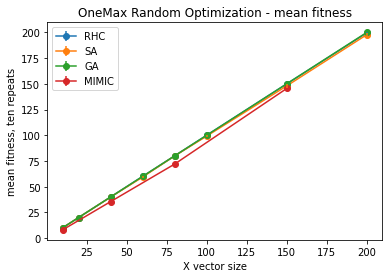

In [41]:

#plot results - fitness
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_fitness, yerr=RHC_std_fitness, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_fitness, yerr=SA_std_fitness, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_fitness, yerr=GA_std_fitness, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_fitness, yerr=MIMIC_std_fitness, barsabove=True, fmt='-o', label='MIMIC')
plt.title('OneMax Random Optimization - mean fitness')
plt.ylabel('mean fitness, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

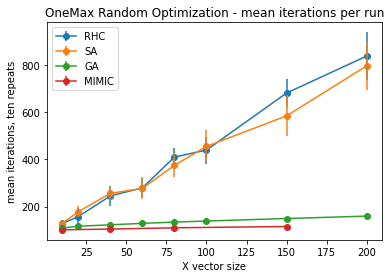

In [44]:
#plot results - iterations
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_iterations, yerr=RHC_std_iterations, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_iterations, yerr=SA_std_iterations, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_iterations, yerr=GA_std_iterations, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_iterations, yerr=MIMIC_std_iterations, barsabove=True, fmt='-o', label='MIMIC')
plt.title('OneMax Random Optimization - mean iterations per run')
plt.ylabel('mean iterations, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

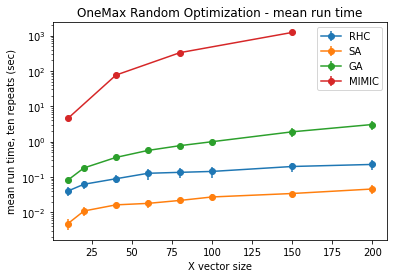

In [43]:
#plot results - run time
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_time, yerr=RHC_std_time, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_time, yerr=SA_std_time, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_time, yerr=GA_std_time, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_time, yerr=MIMIC_std_time, barsabove=True, fmt='-o', label='MIMIC')
plt.title('OneMax Random Optimization - mean run time')
plt.ylabel('mean run time, ten repeats (sec)')
plt.yscale('log')
plt.xlabel('X vector size')
plt.legend()
plt.show()